In [1]:
import os
import sys
import argparse
import msprime
import tskit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import logging
from sklearn.decomposition import PCA
from logging import error, warning, info, debug, critical
import random
from IPython.display import SVG
from PyPDF2 import PdfFileMerger


import matplotlib.font_manager
from IPython.core.display import HTML


In [88]:
nA = 20  
popA = 300
nB = 20 
popB = 300
nC = 20  
popC = 100
nD = 20
popD = 100
nE = 20
popE = 100

nsamps = nA + nB + nC + nD + nE
totpop = popA + popB + popC + popD + popE


p = argparse.ArgumentParser(formatter_class=argparse.ArgumentDefaultsHelpFormatter)
p.add_argument('-v', '--verbose', action='store_true', default = False)
p.add_argument('--debug', action='store_true', default = False)
p.add_argument('--demdebug', action='store_true', default = False)
p.add_argument('--hc', action='store_true', default = False)
#Go into msprime.simulate
p.add_argument('--seqlen', type=float, default=1e7, help = 'sequence length') 
p.add_argument('--mu', type=float, default=1e-8, help = 'mutation rate') # default 1e-8
p.add_argument('--rho', type=float, default=2e-6, help = 'recombination rate') # default 2e-8


p.add_argument('--nsnps', type=int, default=2500, help = 'number of SNPs to use')
p.add_argument('--nchrs', type=int, default=1, help = 'number of SNPs to use')


#Pruning for PCA
p.add_argument('--prune_by_sep', type=float, default=0.0, help = 'min separation between SNPs (otherwise use LD)')
p.add_argument('--LD_threshold', type=float, default=0.2, help = 'max LD between SNPs')
p.add_argument('--seed', type=int, default=0, help = 'random seed for simulation')
#PCA stuff actual
p.add_argument('--pcasamples', default="{},{},{},{},{}".format(nA,nB,nC,nD,nE), help = 'number of samples to include in PCA from each population: n1,n2,...')
p.add_argument('--project_all', action='store_true', default = False, help = 'project all samples onto the PC axes')
p.add_argument('--figtitle', default='Varying Admixture Proportions', help = 'figure title')
p.add_argument('--figfmt', default='svg', choices=['svg', 'pdf', 'png'], help = 'figure format')
p.add_argument('--figsize', default = '12.0,7.0', help = 'figure size in inches')
args = p.parse_known_args()[0]
print(args)
#this stuff is about checking the code info confirms working as expected, debug gives detailed info for when diagnosing probs
loglevel = logging.WARNING
if args.verbose:
	loglevel = logging.INFO
if args.debug:
	loglevel = logging.DEBUG
logging.basicConfig(format = '%(module)s:%(lineno)d:%(levelname)s: %(message)s', level = loglevel)

#just generating figure so size input from args.figsize above
fsize = [float(x) for x in args.figsize.split(',')]



pop_config=[
        msprime.PopulationConfiguration(sample_size=nA,initial_size = popA), #Africa
        msprime.PopulationConfiguration(sample_size=nB,initial_size = popB), #Europe
        msprime.PopulationConfiguration(sample_size=nC,initial_size = popC),
        msprime.PopulationConfiguration(sample_size=nD,initial_size = popD),
        msprime.PopulationConfiguration(sample_size=nE,initial_size = popE)]
        
if args.pcasamples: 
	pcasamples = [int(x) for x in args.pcasamples.split(',')]
demevents=[
          msprime.MassMigration(3, source = 2, dest = 0, proportion = 0.5),
          msprime.MassMigration(3, source = 3, dest = 0, proportion = 0.75),
          msprime.MassMigration(3, source = 4, dest = 0, proportion = 0.25),
          msprime.MassMigration(3.1, source = 2 , dest = 1, proportion =1),
          msprime.MassMigration(3.1, source = 3 , dest = 1, proportion =1),
          msprime.MassMigration(3.1, source = 4 , dest = 1, proportion =1),
          msprime.MigrationRateChange(100, rate = 0.02, matrix_index = (1,0)),
          msprime.MigrationRateChange(100, rate = 0.02, matrix_index = (0,1))]
    

Namespace(LD_threshold=0.2, debug=False, demdebug=False, figfmt='svg', figsize='12.0,7.0', figtitle='Varying Admixture Proportions', hc=False, mu=1e-08, nchrs=1, nsnps=2500, pcasamples='20,20,20,20,20', project_all=False, prune_by_sep=0.0, rho=2e-06, seed=0, seqlen=10000000.0, verbose=False)


Model =  hudson(reference_size=1)
Epoch: 0 -- 3.0 generations
     start     end      growth_rate |     0        1        2        3        4    
   -------- --------       -------- | -------- -------- -------- -------- -------- 
0 |   300      300                0 |     0        0        0        0        0    
1 |   300      300                0 |     0        0        0        0        0    
2 |   100      100                0 |     0        0        0        0        0    
3 |   100      100                0 |     0        0        0        0        0    
4 |   100      100                0 |     0        0        0        0        0    

Events @ generation 3.0
   - Mass migration: Lineages moved with probability 0.5 backwards in time with source 2 & dest 0
                     (equivalent to migration from 0 to 2 forwards in time)
   - Mass migration: Lineages moved with probability 0.75 backwards in time with source 3 & dest 0
                     (equivalent to migration from 0

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1263 mutations below LD theshold


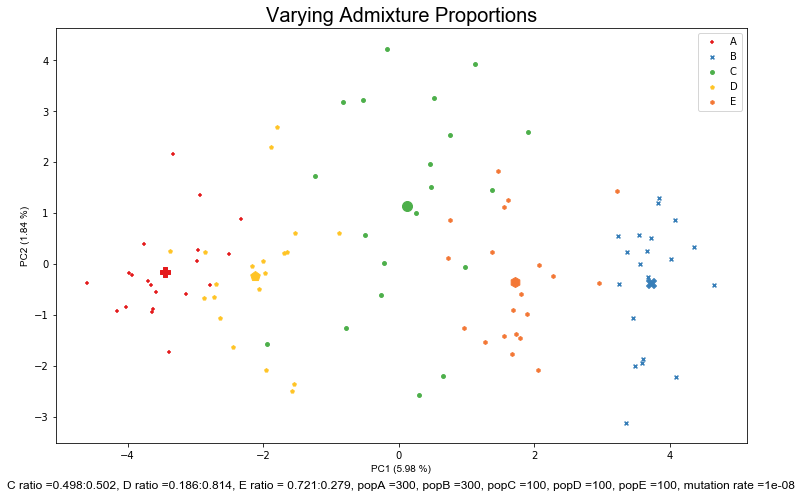

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1319 mutations below LD theshold


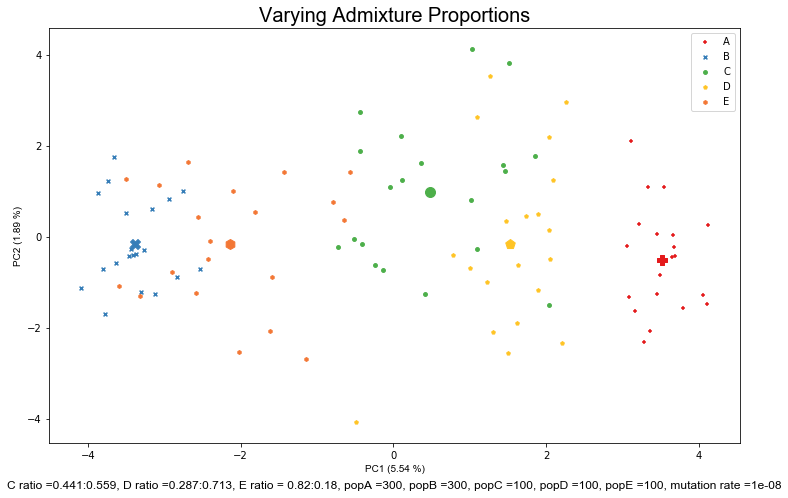

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1187 mutations below LD theshold


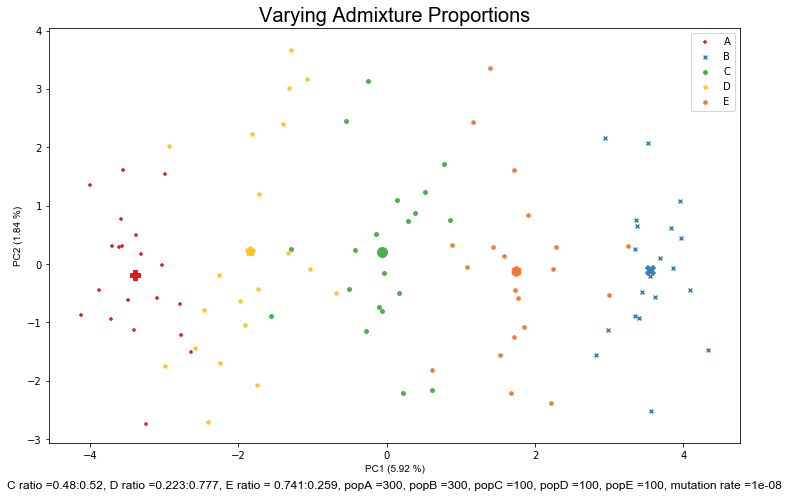

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1203 mutations below LD theshold


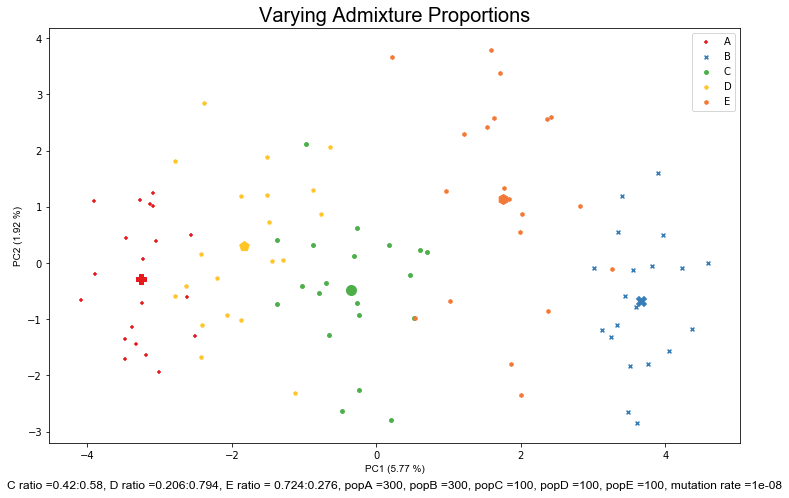

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1175 mutations below LD theshold


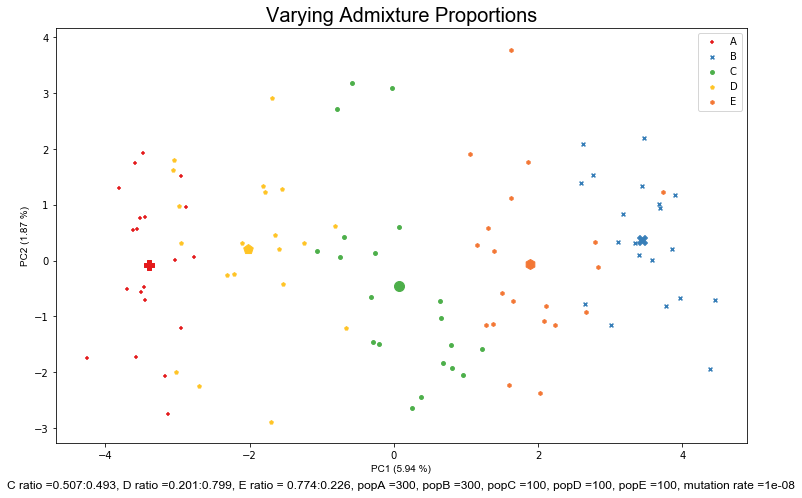

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1246 mutations below LD theshold


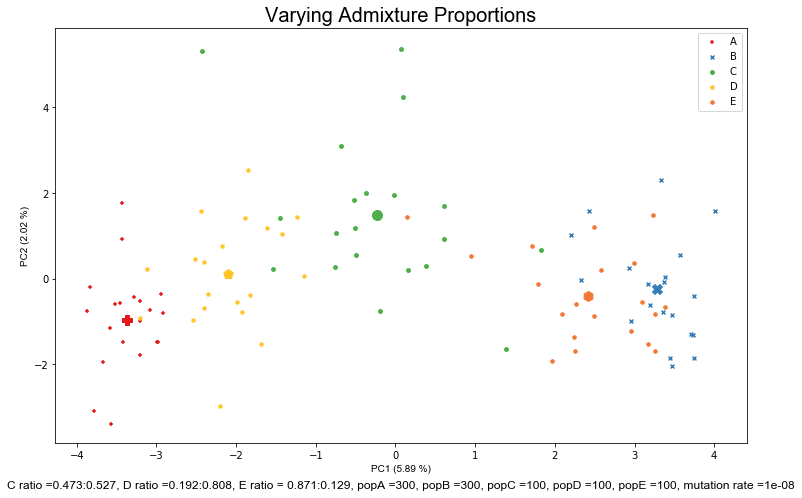

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1215 mutations below LD theshold


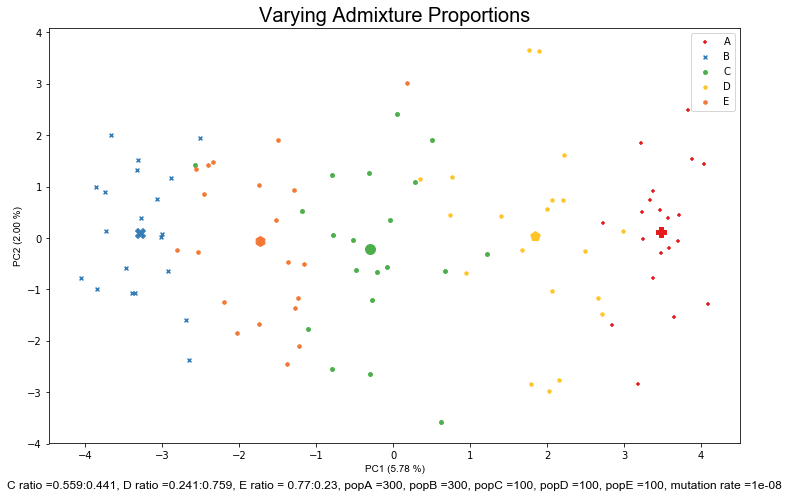

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1197 mutations below LD theshold


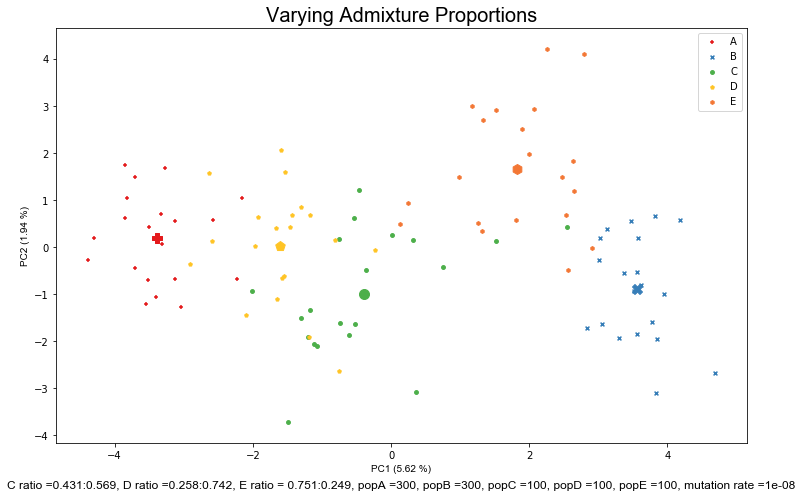

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1234 mutations below LD theshold


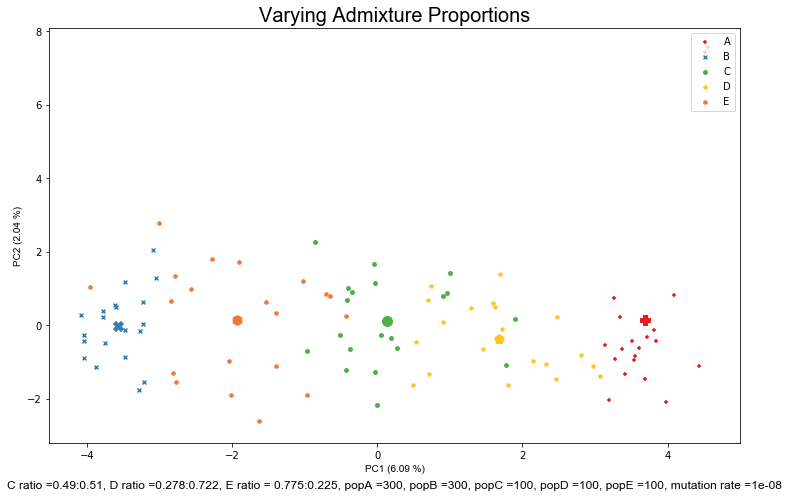

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1281 mutations below LD theshold


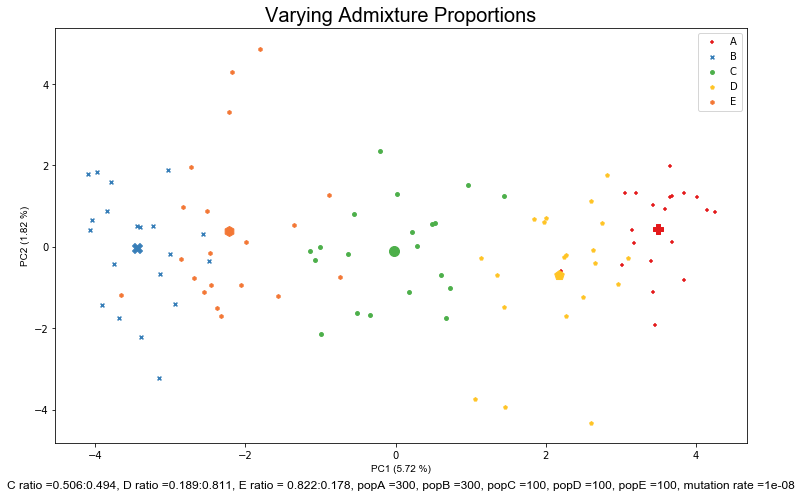

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1231 mutations below LD theshold


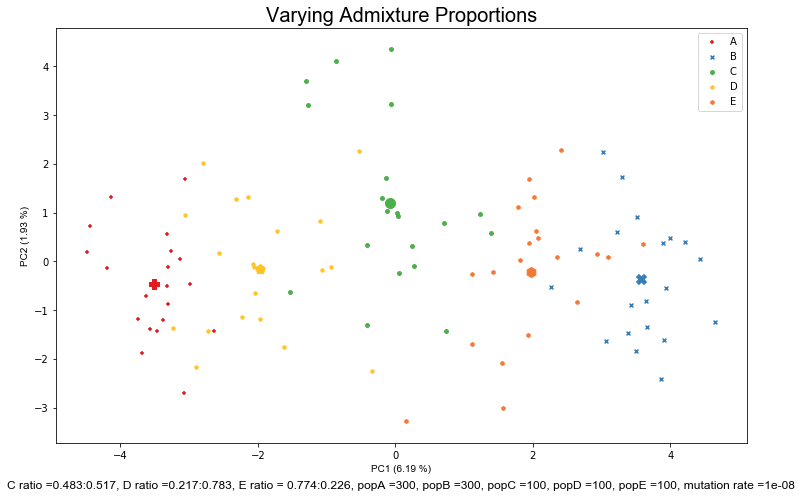

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1207 mutations below LD theshold


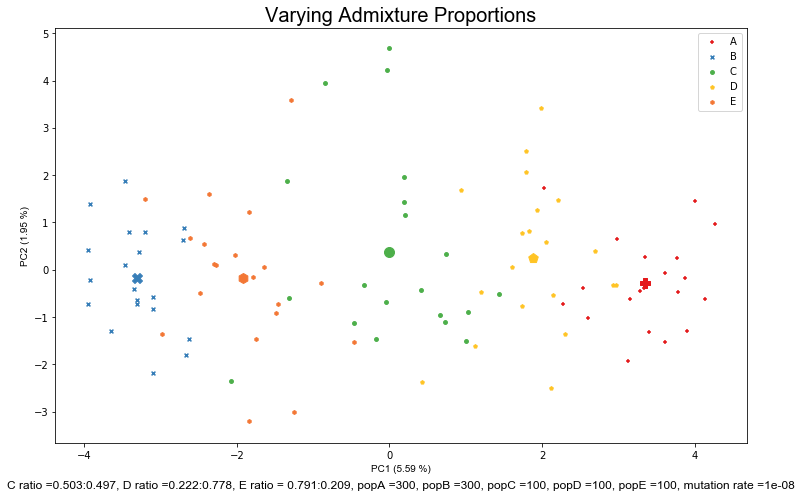

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1242 mutations below LD theshold


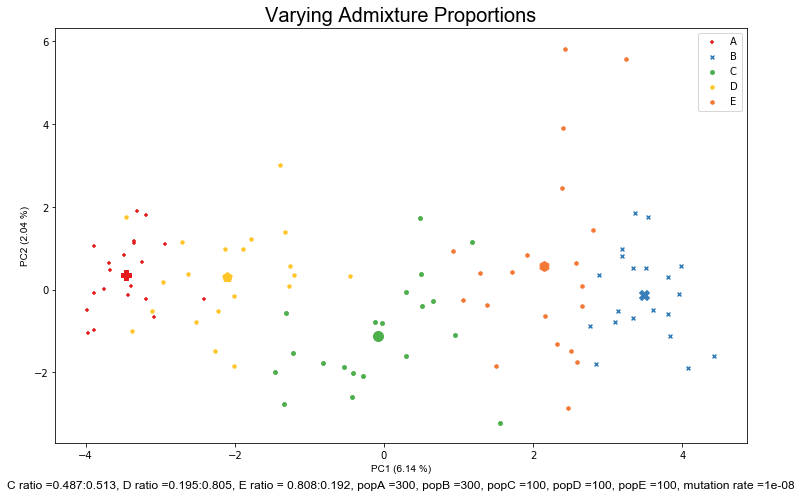

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1247 mutations below LD theshold


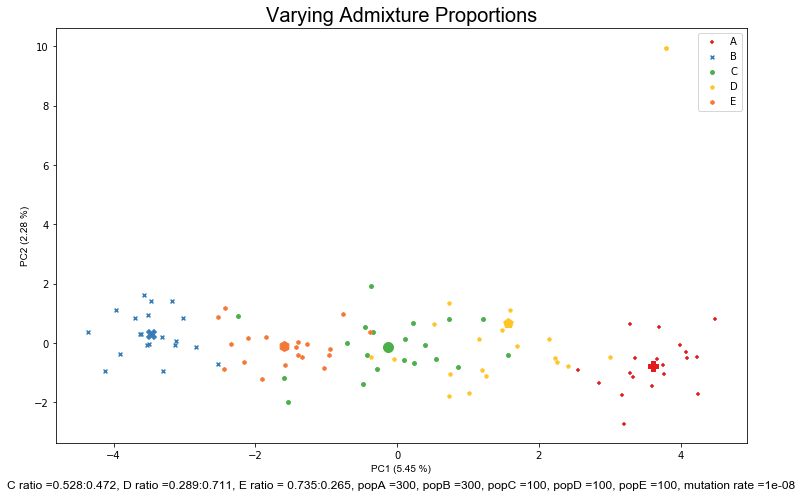

<ipython-input-89-4ac36bae80ff>:43:ERROR: ran out of sites after 1229 mutations below LD theshold


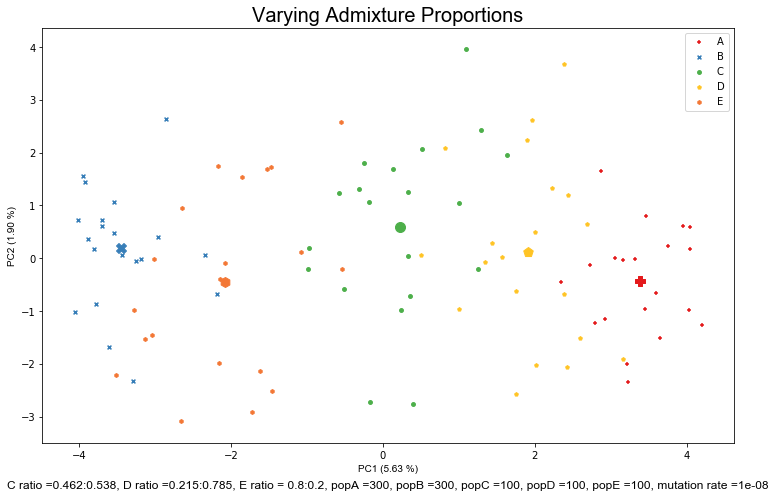

In [89]:
for a in range(1,16):

    random_seed = round(1000 * random.random())
    ts = msprime.simulate(population_configurations=pop_config, demographic_events=demevents, length=args.seqlen, mutation_rate=args.mu, recombination_rate=args.rho, random_seed=random_seed)


    tree = ts.first()
    #colour_map = {0:"red", 1:"blue", 2: "green"}
    #node_colours = {
     #   u: colour_map[tree.population(u)] for u in tree.nodes()} 

    dd = msprime.DemographyDebugger(
        population_configurations=pop_config,
        demographic_events=demevents)
    if a == 1:
        dd.print_history()

    variants = np.empty((args.nsnps,nsamps), dtype="u1")
    j = 0
    if args.prune_by_sep > 0: # currently using LD pruning so this section skipped
        info(f'pruning sites by separation > {args.prune_by_sep}')
        lastpos = 0
        for var in ts.variants():
            if lastpos + args.prune_by_sep > args.seqlen:
                error(f'ran out of sequence after {j} SNPs')
                break
            if var.site.position - lastpos > args.prune_by_sep:
                debug(j, var.site.id, var.site.position, var.genotypes, sep="\t")
                variants[j] = var.genotypes
                j += 1
                lastpos = var.site.position
            if j == args.nsnps:
                break
    else:
        info(f'LD pruning with threshold {args.LD_threshold}')
        ld = tskit.LdCalculator(ts)
        next_mutn = 0
        tvars = ts.variants()
        var = next(tvars)
        while j < args.nsnps:
            r2 = (ld.r2_array(next_mutn, max_mutations=50) < args.LD_threshold)
            if len(r2) == 0 or not np.any(r2):
                error(f'ran out of sites after {j} mutations below LD theshold')
                break
            next_mutn += (1 + np.argmax(r2))
            while var.site.id < next_mutn:
                var = next(tvars)
            variants[j] = var.genotypes
            debug(f'SNP {j}: {var.site.id} at {var.site.position}')
            j += 1
        info(f'last SNP {j}: {var.site.id} at {var.site.position}')

    info(f'running PCA')
    pcadata = np.ndarray.transpose(variants)
    debug(f'data array: {pcadata.shape}')
    pca = PCA(n_components=2)
    pca.fit(pcadata)

    if args.project_all:
        samps_pca = pca.transform(data)
    else:
        samps_pca = pca.transform(pcadata)

    sampa_pca = samps_pca[0:nA]
    sampb_pca = samps_pca[nA:nA+nB]
    sampc_pca = samps_pca[nA+nB:nA+nB+nC]
    sampd_pca = samps_pca[nA+nB+nC:nA+nB+nC+nD]
    sampe_pca = samps_pca[nA+nB+nC+nD:nA+nB+nC+nD+nE]
    #colarr = ['#ee8800', '#ee00ff', '#0033ff', '#00ef00', '#ee0000']


    #plt.scatter(samps_pca[:, 0], samps_pca[:, 1])


    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(sampa_pca[:, 0], sampa_pca[:, 1], c = '#e41a1c', marker="+", s = 15)
    ax.scatter(sampb_pca[:, 0], sampb_pca[:, 1], c = '#377eb8', marker="x", s = 15)
    ax.scatter(sampc_pca[:, 0], sampc_pca[:, 1], c = '#4daf4a', marker='o', s =15)
    ax.scatter(sampd_pca[:, 0], sampd_pca[:, 1], c = '#ffc425', marker='p', s =15)
    ax.scatter(sampe_pca[:, 0], sampe_pca[:, 1], c = '#f37735', marker='h', s =15)
    ax.scatter(np.mean(sampa_pca[:, 0]), np.mean(sampa_pca[:, 1]), c = '#e41a1c', marker = "P", s = 100)
    ax.scatter(np.mean(sampb_pca[:, 0]), np.mean(sampb_pca[:, 1]), c = '#377eb8', marker = "X", s = 100)
    ax.scatter(np.mean(sampc_pca[:, 0]), np.mean(sampc_pca[:, 1]), c = '#4daf4a', marker = "o", s = 100)
    ax.scatter(np.mean(sampd_pca[:, 0]), np.mean(sampd_pca[:, 1]), c = '#ffc425', marker = "p", s = 100)#f830ff
    ax.scatter(np.mean(sampe_pca[:, 0]), np.mean(sampe_pca[:, 1]), c = '#f37735', marker = "h", s = 100)
    plt.xlabel(f'PC1 ({100*pca.explained_variance_ratio_[0]:.2f} %)', fontname = 'Arial')
    plt.ylabel(f'PC2 ({100*pca.explained_variance_ratio_[1]:.2f} %)', fontname = 'Arial')
    red_patch = mpatches.Patch(color='#e41a1c', label='A')
    blue_patch = mpatches.Patch(color='#377eb8', label='B')
    green_patch = mpatches.Patch(color='#4daf4a', label='C - 50:50')
    purple_patch = mpatches.Patch(color='#ffc425', label='D - 75:25')
    black_patch = mpatches.Patch(color='#f37735', label='E - 25:75')
    plt.legend(('A','B','C','D','E'), loc = 'upper right')
    #plt.legend(handles=[red_patch,blue_patch,green_patch,purple_patch,black_patch])
    c_1 = round(abs(np.mean(sampc_pca[:, 0]) - np.mean(sampa_pca[:, 0])) / (abs(np.mean(sampc_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampc_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    c_2 = round(abs(np.mean(sampc_pca[:, 0]) - np.mean(sampb_pca[:, 0])) / (abs(np.mean(sampc_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampc_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    c_ratio = str(c_1) + ':' + str(c_2)
    d_1 = round(abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) / (abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    d_2 = round(abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0])) / (abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    d_ratio = str(d_1) + ':' + str(d_2)
    e_1 = round(abs(np.mean(sampe_pca[:, 0]) - np.mean(sampa_pca[:, 0])) / (abs(np.mean(sampe_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampe_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    e_2 = round(abs(np.mean(sampe_pca[:, 0]) - np.mean(sampb_pca[:, 0])) / (abs(np.mean(sampe_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampe_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)
    e_ratio = str(e_1) + ':' + str(e_2)
    if args.figtitle:
        plt.title(args.figtitle, fontname = 'Arial', fontsize= 20)
        fig.set_size_inches(fsize[0], fsize[1])
        plt.subplots_adjust(left=0.15, bottom=0.1, right=1 - 0.05, top= 1 - 0.075)
    else:
        plt.subplots_adjust(left=0.15, bottom=0.1, right=1 - 0.05, top= 1 - 0.05)

    if args.hc:
        fig.set_size_inches(fsize[0], fsize[1])
        fname = '.'.join([outname + '_' + args.figtitle, args.figfmt])
        plt.savefig(fname, format=args.figfmt)
        info(f'Saved figure to {fname}')
    else:
        txt = 'C ratio =' + str(c_ratio) + ', D ratio =' + str(d_ratio) + ', E ratio = ' + str(e_ratio) +', popA =' + str(popA) + ', popB =' + str(popB) + ', popC =' + str(popC) + ', popD ='+ str(popD) + ', popE =' + str(popE) + ', mutation rate =' + str(args.mu)
        plt.figtext(0.55, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12, fontname = 'Arial')
        

        plt.savefig("PCAplot" + str(a) + ".pdf")
        plt.show()







In [90]:

pdfs = ['PCAplot1.pdf', 'PCAplot2.pdf','PCAplot3.pdf','PCAplot4.pdf','PCAplot5.pdf','PCAplot6.pdf','PCAplot7.pdf','PCAplot8.pdf','PCAplot9.pdf','PCAplot10.pdf','PCAplot11.pdf','PCAplot12.pdf','PCAplot13.pdf','PCAplot14.pdf','PCAplot15.pdf']

merger = PdfFileMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()



In [ ]:
SVG(tree.draw(node_colours=node_colours))

In [54]:
np.mean(sampd_pca[:, 0])

-1.7261429031858369

In [55]:
np.mean(sampa_pca[:, 0])

-3.454771626563495

In [56]:
abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0]))

1.728628723377658

In [57]:
abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))

5.202361868963309

In [58]:
abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))

6.930990592340967

In [76]:
d_1 = round(abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) / (abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)

In [77]:
d_2 = round(abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0])) / (abs(np.mean(sampd_pca[:, 0]) - np.mean(sampa_pca[:, 0])) + abs(np.mean(sampd_pca[:, 0]) - np.mean(sampb_pca[:, 0]))),3)

In [78]:
d_ratio = str(d_1) + ':' + str(d_2)

In [79]:
d_ratio

'0.249:0.751'